# CSCI 347 : Final Project
Matthew Keck, Jadeyn Fincher, Samuel Pierce, Ivan Cline

link to data: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

data description/ dictionary: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/discussion/119320

link to google colab: https://colab.research.google.com/drive/11QqSE7g6e1YIh2dPoeaR8e99jWE4_5PY?usp=sharing

# **Part One**

The data that we have chosen is the credit card approval prediction dataset. We selected this data set to apply what we learned in this class to a practical dataset, so we can potentially make real-world predictions. Also, we are excited to input our data into our prediction model to see what it predicts for us. This data set seeks to find a trend in persons who default on their credit with extra data showing how many days they haven't paid their credit balance. Out of this dataset, we are particularly curious about the relation of education and income to defaulting or not.

Our data set has 95190 instances and twenty attributes. Out of the twenty attributes, there are fourteen categorical attributes and six numerical attributes.

The data mining techniques we would like to use to help solve this problem are.


*   PCA: we will use PCA to help visualize our data and to see if our data can be clustered into a linear problem space.

*   Naive Bayes: We will use Naive Bayes to create a prediction model to accurately predict whether a person will not pay their bill, given the attributes of the data. However, we are unsure if our features are independent. Regardless, we are curious if we can create an accurate Naive Bayes prediction model. If not, its accuracy will be a good baseline comparison for other models we test. We also want to become more familiar with this model because we didn't get to experiment with it in homework or mini-projects.

*   KMeans: We want to use k-means clustering to cluster the data into groups of people who will pay their bills and those who won't. Once we have these clusters, we plan to classify test data with these clusters.

*   DBSCAN: We will also try DBSCAN because if the clusters are not spherical and contain many outliers, k-means may not produce accurate clusters. Therefore if the data set is non-convex in shape, we will apply DBSCAN or some other density-based clustering method because they will be more accurate than k-means in this scenario.

*   Random Forest classifier: We saw that this model was very successful on this dataset according to comments on Kaggle, so we are curious if we can learn about how this model works and successfully implement it.


If we run out of time on the project, we may remove two of these analysis methods. If such an event should occur, we would most likely avoid implementing DBScan and the Random Forest classifier.


# **Part Two**

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import silhouette_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from tabulate import tabulate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

##Import from our github
df= pd.read_csv("https://raw.githubusercontent.com/ivan-cline1/MLfile/main/Mean_ActualFinalSlice.csv")
display(df)

## Data Pre-processing

In [ ]:
## this code block is how we preprocessed our data
''' THIS CODE TAKES A VERY LONG TIME TO RUN, AND ONLY NEEDED TO BE RUN ONCE- SO WE HAVE IT COMMENTED OUT.
The initial dataset provided on kaggle was not only too large for
us to post on github, but it also had some issues that had to be dealt with
through preprocessing. This code gets rid of our values with the missing "OCCUPATION_TYPE", and merges every
observation of a unique person(ID) over many months with eachother, keeping the personal information
the same, taking the mean of the their "months balance", and using their first status record.
'''

'''
#import the initial csvs
df_full = pd.read_csv("application_record.csv")
creditReportDF_full = pd.read_csv("credit_record.csv")

#Drop observations/people who did not have a recorded "occupation type"
df_full.dropna(subset=['OCCUPATION_TYPE'], inplace=True)

#Found all unique ID's (or people) in our modified dataset
ids = df_full['ID'].unique()

#Went through entire credit report dataframe(which held multiple observations for each person)
mask = creditReportDF_full['ID'].isin(ids)

#applied a mask to the credit report dataframe, which means it removed all people who were in the initial df_full, but that did not have an "occupation type" value.
creditReportDF_subset = creditReportDF[mask]

#merged the 2 files based on ID, simplifying everybodies multiple observations down to one, and taking the mean of their "MONTHS_BALANCE"
df_final = pd.merge(df_full,creditReportDF_subset, on='ID', how='inner')
agg_functions = {'CODE_GENDER':'first',
                 'FLAG_OWN_CAR':'first',
                 'FLAG_OWN_REALTY':'first',
                 'CNT_CHILDREN':'first',
                 'AMT_INCOME_TOTAL':'first',
                 'NAME_INCOME_TYPE':'first',
                 'NAME_EDUCATION_TYPE':'first',
                 'NAME_FAMILY_STATUS':'first',
                 'NAME_HOUSING_TYPE':'first',
                 'DAYS_BIRTH':'first',
                 'DAYS_EMPLOYED':'first',
                 'FLAG_MOBIL':'first',
                 'FLAG_WORK_PHONE':'first',
                 'FLAG_PHONE':'first',
                 'FLAG_EMAIL':'first',
                 'OCCUPATION_TYPE':'first',
                 'CNT_FAM_MEMBERS':'first',
                 'MONTHS_BALANCE':'mean',
                 'STATUS':'first'}

#Wrote out to a csv (this is the csv that is used for our data a.)
df_out_csv= df_final.groupby(df_final['ID']).aggregate(agg_functions)
df_out_csv.to_csv("/content/ActualfinalSlice.csv",index=True)
'''

In [ ]:
## this code block takes 9 true lable classes and reduces it to two

df.isnull().values.any()
df.isnull().values.sum()
##STATUS MEANING
# 0: 1-29 days past due
# 1: 30-59 days past due
# 2: 60-89 days overdue
# 3: 90-119 days overdue
# 4: 120-149 days overdue
# 5: Overdue or bad debts, write-offs for more than 150 days
# C: paid off that month
# X: No loan for the month

##THIS CODE IS USED TO MAKE THIS PROBLEM A BINARY CLASSIFICATION PROBLEM-
df['STATUS']= df['STATUS'].replace(['X','C'], 'Y')
df['STATUS'] = df['STATUS'].replace(['0', '1', '2', '3', '4' ,'5','6'], 'N')
##Coverts our STATUS to
#Y: Trustworthy creditor
#N: Non-trustworthy creditor

In [ ]:
## this code block label incodes our catigorical data and takes the absolute
## value of negative data because some of the libaryes dont work with negative
## values

# creating instance of labelencoder
labelencoder1 = preprocessing.LabelEncoder()
labelencoder2 = preprocessing.LabelEncoder()
labelencoder3 = preprocessing.LabelEncoder()
labelencoder4 = preprocessing.LabelEncoder()
labelencoder5 = preprocessing.LabelEncoder()
labelencoder6 = preprocessing.LabelEncoder()
labelencoder7 = preprocessing.LabelEncoder()
labelencoder8 = preprocessing.LabelEncoder()
labelencoder9 = preprocessing.LabelEncoder()

## numberical varables that need to not have negative valuse to work with the
## libraryes in sklearn
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'].values)
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'].values)
df['MONTHS_BALANCE'] = abs(df['MONTHS_BALANCE'].values)

## lable incoding the catigorical varables
df['CODE_GENDER'] = labelencoder1.fit_transform(df['CODE_GENDER'])
df['FLAG_OWN_CAR'] = labelencoder2.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'] = labelencoder3.fit_transform(df['FLAG_OWN_REALTY'])
df['NAME_INCOME_TYPE'] = labelencoder4.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_EDUCATION_TYPE'] = labelencoder5.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS'] = labelencoder6.fit_transform(df['NAME_FAMILY_STATUS'])
df['NAME_HOUSING_TYPE'] = labelencoder7.fit_transform(df['NAME_HOUSING_TYPE'])
df['OCCUPATION_TYPE'] = labelencoder8.fit_transform(df['OCCUPATION_TYPE'])
df['STATUS'] = labelencoder9.fit_transform(df['STATUS'])
display(df)

In [ ]:
## this code block formates the table seen below

labelencoder1.classes_
labelencoder2.classes_
labelencoder3.classes_
labelencoder4.classes_
labelencoder5.classes_
labelencoder6.classes_
labelencoder7.classes_
labelencoder8.classes_
labelencoder9.classes_

table1 = [['attributes'],
         ['null values'],
         ['classes'],
         ['average'],
         ['median']]

table2 = [['attributes'],
         ['null values'],
         ['classes'],
         ['average'],
         ['median']]

table3 = [['attributes'],
         ['null values'],
         ['classes'],
         ['average'],
         ['median']]

table4 = [['attributes'],
         ['null values'],
         ['classes'],
         ['average'],
         ['median']]

names1 = df.columns[:7].values.tolist()

for i in names1:
  table1[0].append(i)
  table1[1].append(df[i].isnull().values.sum())


  if (i == "ID"):
    table1[3].append("Na")
    table1[4].append('Na')
  else:
    table1[3].append(df[i].mean().round(2))
    table1[4].append(df[i].median())




names2 = df.columns[7:9].values.tolist()

for i in names2:
  table2[0].append(i)
  table2[1].append(df[i].isnull().values.sum())
  table2[3].append(df[i].mean().round(2))
  table2[4].append(df[i].median())



names3 = df.columns[9:16].values.tolist()

for i in names3:
  table3[0].append(i)

  table3[1].append(df[i].isnull().values.sum())

  table3[3].append(df[i].mean().round(2))
  table3[4].append(df[i].median())

names4 = df.columns[16:].values.tolist()

for i in names4:
  table4[0].append(i)
  if (i == "OCCUPATION_TYPE"):
    table4[1].append(28108)
  else:
    table4[1].append(df[i].isnull().values.sum())

  table4[3].append(df[i].mean().round(2))
  table4[4].append(df[i].median())


table1[2].append('Na')
table1[2].append(labelencoder1.classes_)
table1[2].append(labelencoder2.classes_)
table1[2].append(labelencoder3.classes_)
table1[2].append('Na')
table1[2].append('Na')
table1[2].append(labelencoder4.classes_)
table2[2].append(labelencoder5.classes_)
table2[2].append(labelencoder6.classes_)
table3[2].append(labelencoder7.classes_)
table3[2].append('Na')
table3[2].append('Na')
table3[2].append('Na')
table3[2].append('Na')
table3[2].append('Na')
table3[2].append('Na')
table4[2].append(labelencoder8.classes_)
table4[2].append('Na')
table4[2].append('Na')
table4[2].append(labelencoder9.classes_)

print(tabulate(table1, tablefmt='fancy_grid'))
print()
print(tabulate(table2, tablefmt='fancy_grid'))
print()
print(tabulate(table3, tablefmt='fancy_grid'))
print()
print(tabulate(table4, tablefmt='fancy_grid'))

## Data Visulization with Principal Component Analysis

In [ ]:
## this code block takes a subset of our dataframe that excludes our true labels
## and ID
## this code block also runs princpal compnent analysis on our data and plots
## our data with the first two princpal components as axis

## creating a dataframe that has all attributes excluding the persons id number and the status
df1 = df[['CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS','MONTHS_BALANCE']]

## normalizes the data
scaler = StandardScaler()
scaler.fit(df1)
scaled_data = scaler.transform(df1)

## applying pca to visualize the normalized data
n = 18
pca = PCA(n_components = n)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

## creates a grpah with the colors being the true status of the persons credet
## and the x and y axis being the first and second principal component.
colors = {0: 'red', 1: 'blue'}

true_color_series = df['STATUS'].map(colors)

plt.scatter(x_pca[:,0],x_pca[:,1],c=true_color_series,s=2)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('2-dimensional PCA visualization')


In [ ]:
## this code block plots the data with the first three princpal components as
## its axis

ax = plt.axes(projection ="3d")
ax.scatter3D(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=true_color_series,s=2)
plt.title("3-dimensional PCA visualization")

In [ ]:
## this code block plots the variance explaind by each principal component and
## plots it in a bar chart

numbers = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']

plt.bar(numbers,pca.explained_variance_ratio_,color='blue',width=0.4)

plt.xlabel("r components")
plt.ylabel("total variance explained by r")
plt.title("Principal Components Bar Chart")
plt.show

## Gauisean Niave Bayes

In [ ]:
## this code block separtes 80% of our data to train Gauisean Niave Bayes and
## 20% to train Gausian Niave Bayes

## this code block also caluclates several metrics seen below that quantify
## how well the model preformed

## original data
X_train, X_test, y_train, y_test = train_test_split(df1.values,df['STATUS'].values,test_size=0.20, random_state=4)

## Gausean niavie bays will most likely use this instead of niave bays above
cGNB = GaussianNB()
cGNB.fit(X_train, y_train)
predictionsGaussianNB = cGNB.predict(X_test)

labels = [0,1]
bayes_cm = confusion_matrix(y_test, predictionsGaussianNB, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=bayes_cm, display_labels=['No','Yes'])
disp.plot();

## gender code | accuracy score : 0.7606922617863537 f score : 0.8640831544458254
## own car | accuracy score : 0.7606922617863537 f score : 0.8640831544458254
##

score = metrics.accuracy_score(y_test,cGNB.predict(X_test))
recall = metrics.recall_score(y_test,cGNB.predict(X_test))
precision = metrics.precision_score(y_test,cGNB.predict(X_test))


TN = bayes_cm[0][0]
FN = bayes_cm[1][0]
TP = bayes_cm[1][1]
FP = bayes_cm[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

niave_table = [['recall of predicted 0'],
               ['recall of predicted 1'],
               ['precision of predicted 0'],
               ['precision of predicted 1'],
               ['accuracy score'],
               ['f score']]

niave_table[0].append(TNR)
niave_table[1].append(TPR)
niave_table[2].append(NPV)
niave_table[3].append(PPV)
niave_table[4].append(accuracy_score(y_test, predictionsGaussianNB))
niave_table[5].append(f1_score(y_test, predictionsGaussianNB))
print(tabulate(niave_table, tablefmt='fancy_grid'))
print()


## Kmeans Clustering

In [ ]:
## this code block plots the objective function sw we know the best number of
## clusters to pick

inertias = np.zeros(9)
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit_predict(df1.values)
    inertias[i-1] = kmeans.inertia_
plt.plot(range(1,10), inertias, c='b', marker='.')
plt.xlabel("number of k clusters")
plt.ylabel("Inertias")
plt.title('Objective Function for K-means')

In [ ]:
## this code block separtes 80% of our data to train kmeans and
## 20% to train kmeans

## this code block also caluclates several metrics seen below that quantify
## how well the model preformed

## kmeans using the testing data
kmeans = KMeans(n_clusters=2, init='random', max_iter=300, random_state=0)
## clusters kmeans predicted for the training data
kmeans.fit(X_train, y_train)
trained_cluster_labels = kmeans.predict(X_train)
pred_cluster_labels = kmeans.predict(X_test)

kmeans.cluster_centers_

labels = [0,1]
kmeans_cm = confusion_matrix(y_test, pred_cluster_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=kmeans_cm, display_labels=['No','Yes'])
disp.plot();

## tests to se how well kmeans clustered the data
score = metrics.accuracy_score(y_test,kmeans.predict(X_test))
recall = metrics.recall_score(y_test,kmeans.predict(X_test))
precision = metrics.precision_score(y_test,kmeans.predict(X_test))



TN = kmeans_cm[0][0]
FN = kmeans_cm[1][0]
TP = kmeans_cm[1][1]
FP = kmeans_cm[0][1]



# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

kmeans_table = [['recall of predicted 0'],
               ['recall of predicted 1'],
               ['precision of predicted 0'],
               ['precision of predicted 1'],
               ['accuracy score'],
               ['f score'],
               ['inertia']]

kmeans_table[0].append(TNR.round(2))
kmeans_table[1].append(TPR.round(2))
kmeans_table[2].append(NPV.round(2))
kmeans_table[3].append(PPV.round(2))
kmeans_table[4].append(accuracy_score(y_test, pred_cluster_labels).round(2))
kmeans_table[5].append(f1_score(y_test, pred_cluster_labels).round(2))
kmeans_table[6].append(kmeans.inertia_)
print(tabulate(kmeans_table, tablefmt='fancy_grid'))
print()


In [ ]:
## this code block plots the data with the princpal components as its axis and
## colors the data baised on how k-means clustered the data

## convertes cluster labels into a list of colors so we can color the scatter
## plot for loop does conversion
pred_color_series = []

for i in range(len(trained_cluster_labels)):
  if(trained_cluster_labels[i] == 0):
    pred_color_series.append('red')
  else:
    pred_color_series.append('blue')

print(len(pred_color_series))

# scatter plot
plt.scatter(x_pca[:20107,0],x_pca[:20107,1], c=pred_color_series, s=2)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='yellow', s=20)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('2-dimensional K-means clustering')

In [ ]:
pred_color_series = []

for i in range(len(trained_cluster_labels)):
  if(trained_cluster_labels[i] == 0):
    pred_color_series.append('red')
  else:
    pred_color_series.append('blue')

print(len(pred_color_series))

# scatter plot
plt.scatter(x_pca[:20107,0],x_pca[:20107,1], c=pred_color_series, s=1)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='yellow', s=20)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('2-dimensional K-means clustering')

In [ ]:
## this code block is a three d plot of the clustered data using the princepal
## components as its axis

ax = plt.axes(projection ="3d")
ax.scatter3D(x_pca[:20107,0],x_pca[:20107,1],x_pca[:20107,2],c=pred_color_series,s=2)
ax.scatter3D(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='yellow', s=50)
plt.title("3-dimensional K-means clustering")

## DBSCAN Clustering

In [ ]:
## this code block runs DBSCAN on our training data

dbs = DBSCAN(eps=8, min_samples = 5)
dbs.fit(X_train)
dbs.labels_


n_clusters = len(set(dbs.labels_)) - (1 if -1 in dbs.labels_ else 0)
print(len(set(dbs.labels_)))
print('number of clusters: ', n_clusters)
n_noise_points = sum(dbs.labels_ == -1)
print('number of noise points: ',n_noise_points)
print(len(dbs.labels_))



## Finding the Best DBSCAN Parameter Settings

In [ ]:

##This block of code was used to find the "best" hyper parameters for dbscan. It takes a very long time to run, so it is commented out
'''def dbScan(DataTrainAttributes,DataTrainLabels,epsilon,minsamples):
  dbs = DBSCAN(eps=epsilon, min_samples = minsamples)
  dbs.fit(DataTrainAttributes)
  return f1_score(DataTrainLabels, dbs.labels_, average= 'weighted'), epsilon, minsamples

minSamplesCycle=[1,2,3,4,5]
listOfRecords=[]
epscounter=2
##This loop will run through about 500 different combinations of epsilon value and minsamples, recording the fscore for each
for i in range(int(20/.2)):
  epscounter+=.2
  for j in minSamplesCycle:
    score,eps,min= dbScan(X_train,y_train,epscounter,j)
    listOfRecords.append([score,eps,min])
#####This loop is used to see the best hyperparameters for our data out of the 500 combinations.
max = 0
for indice,i in enumerate(listOfRecords):
  if i > listOfRecords[max]:
    max=indice
print(listOfRecords[max])'''



Best results: .00367 f-score

epsilon: 8.800000000000002

minpts : 5

In [ ]:
## this code block plots the data with the princpal components as its axis and
## colors the data baised on how DBSCAN clustered the data

##PLOTTING
plt.scatter(x_pca[:20107,0], x_pca[:20107,1], c= dbs.labels_, s =1)
plt.title('2D PCA of our input data - DBSCAN coloring')
plt.xlabel('X1')
plt.ylabel('X2')



In [ ]:
## this code block is a three d plot of the clustered data using the princepal
## components as its axis

ax = plt.axes(projection ="3d")
ax.scatter3D(x_pca[:20107,0],x_pca[:20107,1],x_pca[:20107,2],c=dbs.labels_,s=2)
plt.title('3D PCA of our input data - DBSCAN coloring')
plt.xlabel('X1')
plt.ylabel('X2')



## Random Forest Classifier

In [ ]:
## this code block separtes 80% of our data to train Random Forest Classifier and
## 20% to train kmeans

## this code block also caluclates several metrics seen below that quantify
## how well the model preformed

from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfcModel = RandomForestClassifier(n_estimators=100,criterion='entropy')
rfcModel.fit(X_train,y_train)
# predictions
rfcModel_predict = rfcModel.predict(X_test)

print(" Confusion Matrix for random forest classifier")
print(metrics.confusion_matrix(y_test, rfcModel_predict))
print(metrics.f1_score(y_test,rfcModel_predict))

labels = [0,1]
randomForest_cm = confusion_matrix(y_test, rfcModel_predict, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=randomForest_cm, display_labels=['No','Yes'])
disp.plot();


TN = randomForest_cm[0][0]
FN = randomForest_cm[1][0]
TP = randomForest_cm[1][1]
FP = randomForest_cm[0][1]

print(FP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

kmeans_table = [['recall of predicted 0'],
               ['recall of predicted 1'],
               ['precision of predicted 0'],
               ['precision of predicted 1'],
               ['accuracy score'],
               ['f score']]

kmeans_table[0].append(TNR.round(2))
kmeans_table[1].append(TPR.round(2))
kmeans_table[2].append(NPV.round(2))
kmeans_table[3].append(PPV.round(2))
kmeans_table[4].append(accuracy_score(y_test, rfcModel_predict).round(2))
kmeans_table[5].append(f1_score(y_test, rfcModel_predict).round(2))
print(tabulate(kmeans_table, tablefmt='fancy_grid'))
print()


In [ ]:
featImportanceValues = rfcModel.feature_importances_
featNames = list(df1.columns)
dfFeatImportance = pd.DataFrame({'Feature': featNames,'Importance': featImportanceValues})
print(dfFeatImportance)

## Predictions for Personal Data

In [ ]:
## matthew's data
print(cGNB.predict([[1,1,0,0,5000,3,2,3,4,9912,0,1,0,0,1,6,1,36]]))
print(kmeans.predict([[1,1,0,0,5000,3,2,3,4,9912,0,1,0,0,1,6,1,36]]))
print(rfcModel.predict([[1,1,0,0,5000,3,2,3,4,9912,0,1,0,0,1,6,1,36]]))
print()
##Ivan's data
print(cGNB.predict([[1,1,0,0,10000,3,2,3,4,8102,1,0,0,1,1,6,0,0]]))
print(kmeans.predict([[1,1,0,0,10000,3,2,3,4,8102,1,0,0,1,1,6,0,0]]))
print(rfcModel.predict([[1,1,0,0,10000,3,2,3,4,8102,1,0,0,1,1,6,0,0]]))


# **Part Three**

## What problem were you trying to solve or help solve?

We are trying to create a good model for predicting whether or not someone will default on their credit loans. A version of our model could give banks more insight into their consumers and allow them to use this insight when distributing loans.

## Describe the data:



*   How many instances and attributes?
  *   25134 instances and 18 attributes after preprocessing.
  *   1048575 instances and 20 attributes before preprocessing.
*   Any missing values?
  *   We removed any missing values in our data, specifically, there were 28108 instances of unique ids (which corresponded to about 500000 observations)  with null values for the occupation category. The observations associated with these IDs were dropped. We also collapsed multiple observations of the same unique ID into one observation, to make the dataset even smaller and to balance it. This resulted in our 25134 instances, with each instance ID being unique. (The details of this preprocessing can be found in the Google Colab notebook in the “Preprocessing” section).
*   The number of categorical and numeric attributes?
  *   After preprocessing there were 6 numerical attributes and 13 categorical.



## What pre-processing techniques did you apply and why (justify the use of each technique you used, for example, label encoding vs. one-hot encoding)?

We applied several preprocessing techniques to our data. First, we carefully identified all instances with the same ID and merged them. The merging process eliminated redundant entries in our data, ensuring each individual had a single record. We also deleted any entries that had a missing occupation type. Then, we computed the average number of months a person had an account by taking the average month’s balance for each unique ID.

We used label encoding over one hot encoding because one hot encoding and Gaussian Naive Bayes are incompatible. We also took the absolute value of any negative instances in our data because some algorithm imports can experience difficulty when confronted with negative values. The preprocessing techniques we applied allowed us to use several predictive models, including K-means, DBScan, Random Forest Classifier, and Naive Bayes, to effectively classify our data into distinct groups so we could analyze their accuracy.

## What data mining techniques did you apply and why (justify the use of each technique you used, for example, why did you use k-means instead of DBSCAN)?

The data mining techniques we applied were Principal Component Analysis, Gaussian Naive Bayes, K-means clustering, and a Random Forest Classifier. We used Principal Component Analysis to visualize our data. The principal component analysis allowed us to reduce the dimensionality of our data from eighteen attributes to only two or three while also maintaining the most significant amount of variance. Unfortunately, the first three principal components only explain 32% of the variance of our data, which means the variance is distributed somewhat equally throughout all our attributes.

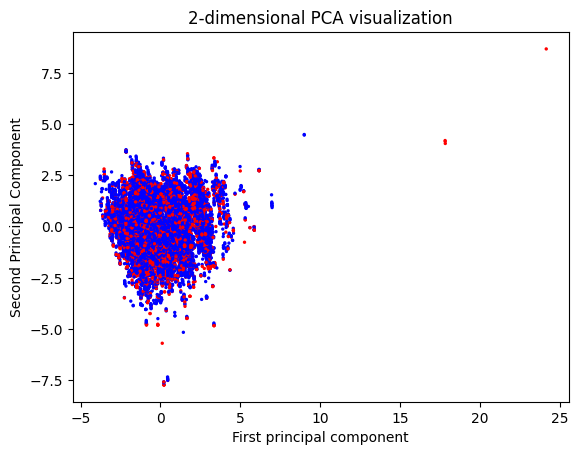

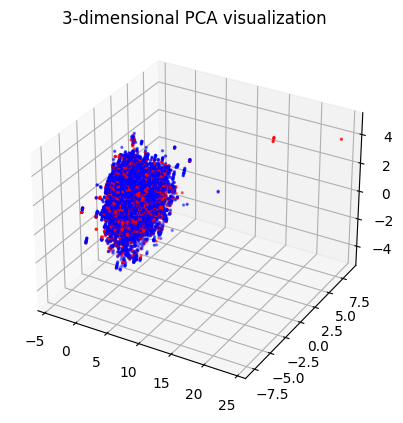

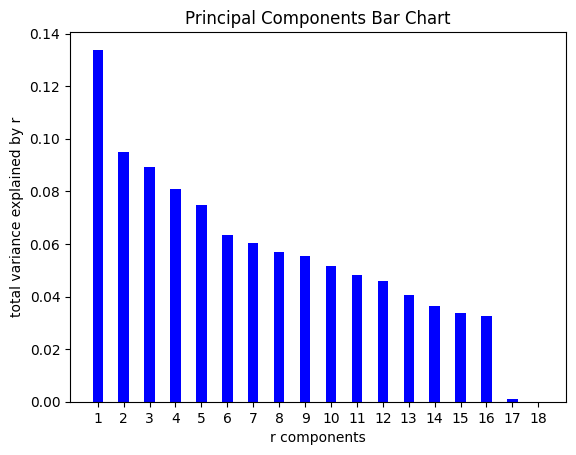

We used Gaussian Naive Bayes as a model to classify our data because we hypothesized that the problem of predicting if a person would default on their loans was linearly separable, which is also one of the reasons we thought K-means Clustering might have worked as well. Unfortunately, we were mistaken. While we reached an accuracy score of 75.8%, our model had difficulty classifying True Negative instances in our data. In the confusion matrix, you can see that our Gaussian Naive Bayes model predicted 1177 false positives. To quantify these miscalculations, we computed the recall for the “No” class, which was 2%. However, our model did perform much better when classifying the “Yes” class achieving a 98% for its recall. These metrics proved that Gaussian Naive Bayes was ill-suited for this task, and we would need to try other models. We believe the issues with Naive Bayes occurred because our dataset is unbalanced, and the attributes may not be independent. Finally, we used Gaussian Naive Bayes instead of regular Naive Bayes because regular Naive Bayes is intended only for categorical data, and our data contained both numerical and categorical attributes.

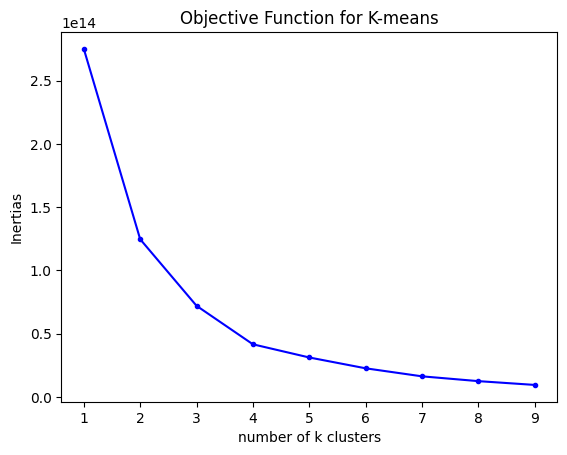

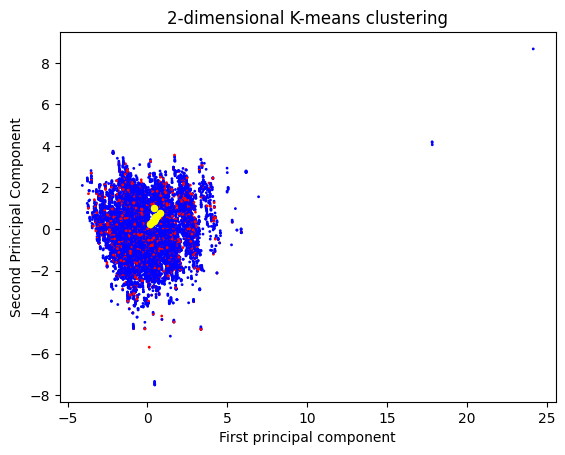

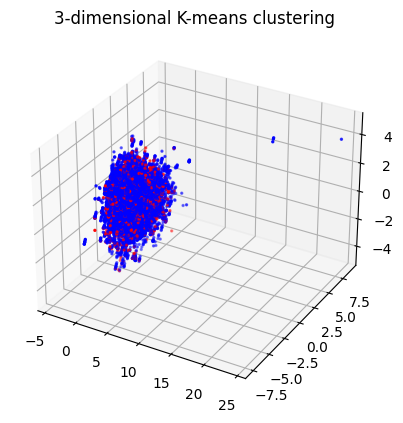

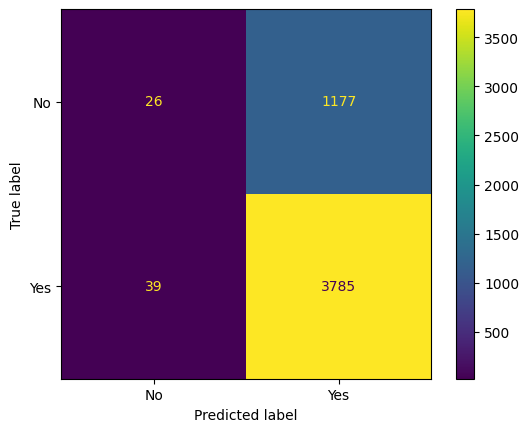

The next model we used for classification was K-means clustering. We used K-means clustering over DBSCAN because when we tried DBSCAN on our dataset, it would create one large cluster or hundreds of smaller clusters, with both options achieving a poor F-score. We believe this occurred because of the curse of dimensionality. As mentioned above, our data has 18 attributes, and DBSCAN is unreliable in high dimensionality because all the points fall closer and closer together as the dimensionality increases. Because of this, the epsilon neighborhood that DBSCAN relies on to cluster the data loose’s its meaning. Because of this difficulty, we opted to use K-means instead because the dimensionality of data does not affect K-means as much as it does with DBSCAN. After feeding our data to K-means, we found that the overall accuracy score was 69%. Curiously this is a step down from the 75% accuracy score obtained with Gaussian Naive Bayes. However, as you can see from our confusion matrix, the recall for the true negative category went from 2% under Gaussian Naive Bayes to 14% when using K-means to classify the data. Unfortunately, K-means classified more False negatives than Gaussian Naive Bayes, which caused our recall to decrease from 99% to 86%. While we believe this was an improvement over Naive Bayes, we weren't happy with K-means overall performance, so we decided to try a Random Forest Classifier to produce a better classification model.

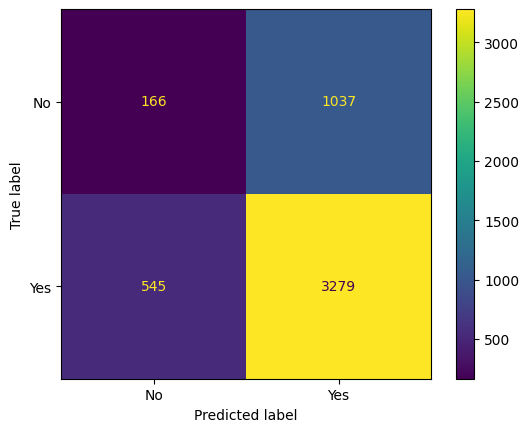

The final model we applied to this problem was a Random Forest Classifier. The Random Forest Classifier model was the most effective model we used for our data boasting an 80% accuracy score, 87% f score, and far better recall in both categories. We learned about Random Forest Classifiers from the comments on the Kaggle page where we downloaded our data. We decided to use this model after reading how effective it was for classifying this data set. Although we didn't learn this model in class, we still wanted to try it, especially after the poor results from K-means and Naive Bayes.

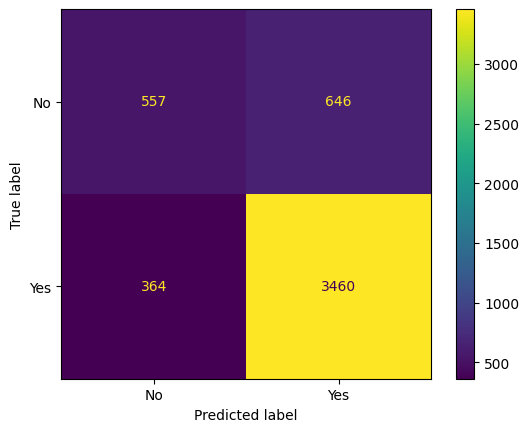

## What did you learn through your analysis?

While analyzing our data, we learned that predicting whether a person will pay back their debts is a challenging problem. After having limited success with Gaussian Naive Bayes and K-means, we had to learn and implement Random Forest Classifier to achieve reasonably high accuracy. Also, through our analyses, we found that the most influential attribute according to this data set when it came to the likelihood of a person paying their debts was the month's balance, how old they were, and the number of days employed at a job. We also learned the limitations of algorithms like Naive Bayes, DBSCAN, and K-means when we tried to use them to analyze our data. When using Naive Bayes, we found that while it did have high accuracy,  this high accuracy was likely due to our dataset being unbalanced. Also, the prior probabilities calculated for our target labels were the only probabilities considered for our Naive Bayes model. Unfortunately, this led to a model that just ended up guessing that most people would pay back their debts (because that target label represented a large proportion of our data). Sadly this isn’t very helpful as our model wasn’t “predicting” anything based on the attributes provided. For DBSCAN, we saw in practice what we had learned in class that DBSCAN was ineffective on our high dimensionality data. We tried 500 parameter tuning for the min-points and the epsilon values, and all were unsuccessful. When using K-means to analyze our data, we had similar problems to Naive Bayes, although they were less acute. Finally, we entered our data into our model and learned that our model predicts us to be untrustworthy with credit.


## Was anything about your results surprising or unexpected?

We expected that each algorithm would get an F-Score of at least .50, but when it came to DBSCAN, our F-Score was shockingly low. We got an F-score of .00367, with the best parameter settings we could find for DBSCAN. To put this in perspective, we thought K-means and Dbscan would be relatively the same. However, K-means managed to get an f-score of .81. This shows that our model has very little that you can extract based on density alone, and models based on density are highly inaccurate. Our use of the Random Forest Classifier was a welcome surprise having our highest f-score of .87. However, we should have expected this due to the Random Forest Classifier’s ability to handle a higher dimensional dataset and non-linear relationships. In conclusion, we were surprised at how challenging the problem would be and how ineffective DBSCAN, K-means, and Naive Bayes were.

## How will your work help with understanding the problem you set out to solve?

Our work has helped with understanding the problem of classifying loan defaulters and non-loan defaulters by trying many classification models and discovering which ones are effective and which are not. Namely, the Random Forest classifier proved particularly effective on this data set, while we showed DBSCAN was ineffective. Our work also gives a good baseline to build on because we have cleaned the data removing any null values and condensing multiple entries of the same ID into one instance. Our cleaned data is especially helpful in understanding this problem because we can apply other models without having to clean the data again.

The main lesson we can take towards solving the proposed problem after all our work and testing is that this problem is much more complicated to solve than it would seem to be on the surface. Any algorithms we tried that struggled with many dimensions tended to fall apart when trying to predict the outcome of our question. Because of this, for further and more meaningful analysis, we will need to try higher-quality algorithms that are good at dealing with higher dimensional data that may not be linearly separable. We also learned that this data set tends to fall victim to the curse of dimensionality, meaning that without some form of principal component analysis, it can be difficult to extrapolate meaningful information to answer the question from the data.

One more insightful thing we learned is that density-based analysis seems to be unhelpful in finding any information based on the data, and with the effectiveness of the Random Forest Classifier, it could be safe to assume that whatever relationship we are looking for to answer our question does not lie within the realm of linear relationships. Finally, our work has shown that we can solve this problem given more time and resources.

## What else would you do if you had more time?

If we had more time, we would try artificially balancing our dataset to see how our Naive Bayes and clustering algorithms would perform. We would also look at our DBSCAN model and observe any intriguing patterns within the hundreds of clusters DBSCAN made, especially in the set of noise points found. Also, we would likely read and research more about the Random Forest Classifier model. Research into this model would allow us to look into how we could manipulate the hyperparameters of the model for better accuracy. Also, it would increase our understanding of what the model is doing with our data and what it is learning. If we had more time, we would research more state-of-the-art data mining techniques and anomaly detection models that we believe could be effective for the problem of credit card default classification. More research would allow us to understand why the models learned in class may have failed.